In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
from sklearn.linear_model import LinearRegression

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
raw_df = pd.read_csv("./fantasy_raw.csv")
player_lookup = raw_df[raw_df['name'].str.contains("Kelly")]
player_lookup

,id,name,GAME_DATE,MATCHUP,MIN,FGM,FGA,FG3M,FG3A,FTM,...,BLK,TOV,PTS,DD,TD,fp,month,games,game_date,season
127095,203482,Kelly Olynyk,"MAY 16, 2021",HOU @ ATL,24,3,11,2,5,8,...,1,2,16,0,0,41.0,2021/05,1,2021-05-16,2020-2021
127096,203482,Kelly Olynyk,"MAY 14, 2021",HOU vs. LAC,31,6,14,1,4,7,...,0,3,20,1,0,77.0,2021/05,1,2021-05-14,2020-2021
127097,203482,Kelly Olynyk,"MAY 12, 2021",HOU @ LAL,25,6,11,4,6,8,...,0,5,24,0,0,59.5,2021/05,1,2021-05-12,2020-2021
127098,203482,Kelly Olynyk,"MAY 10, 2021",HOU @ POR,29,5,12,1,2,10,...,0,3,21,0,0,53.5,2021/05,1,2021-05-10,2020-2021
127099,203482,Kelly Olynyk,"MAY 07, 2021",HOU @ MIL,31,7,15,1,4,8,...,1,4,23,1,0,75.0,2021/05,1,2021-05-07,2020-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128388,1626162,Kelly Oubre Jr.,"NOV 14, 2015",WAS vs. ORL,10,2,3,0,1,0,...,0,0,4,0,0,7.0,2015/11,1,2015-11-14,2015-2016
128389,1626162,Kelly Oubre Jr.,"NOV 10, 2015",WAS vs. OKC,26,4,8,2,4,1,...,0,1,11,0,0,17.0,2015/11,1,2015-11-10,2015-2016
128390,1626162,Kelly Oubre Jr.,"NOV 07, 2015",WAS @ ATL,1,0,0,0,0,0,...,0,0,0,0,0,0.0,2015/11,1,2015-11-07,2015-2016
128391,1626162,Kelly Oubre Jr.,"NOV 06, 2015",WAS @ BOS,14,3,9,0,4,1,...,0,1,7,0,0,11.0,2015/11,1,2015-11-06,2015-2016


In [14]:
player_id = 203482
last_season = '2020-2021'
season_start_date = '2020-12-22'
season_end_date = '2021-05-16'

In [15]:
plot_columns = ['id','name','game_date','fp','season']
filtered_plot_df = raw_df.loc[raw_df['season'] == last_season][raw_df['id'] == player_id][plot_columns]
filter = filtered_plot_df[['game_date','fp']]
filter.set_index('game_date', inplace = True)
filter

<ipython-input-15-86bb8ad11b0d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_plot_df = raw_df.loc[raw_df['season'] == last_season][raw_df['id'] == player_id][plot_columns]


,fp
game_date,
2021-05-16,41.0
2021-05-14,77.0
2021-05-12,59.5
2021-05-10,53.5
2021-05-07,75.0
...,...
2021-01-04,39.0
2021-01-01,30.5
2020-12-30,41.0


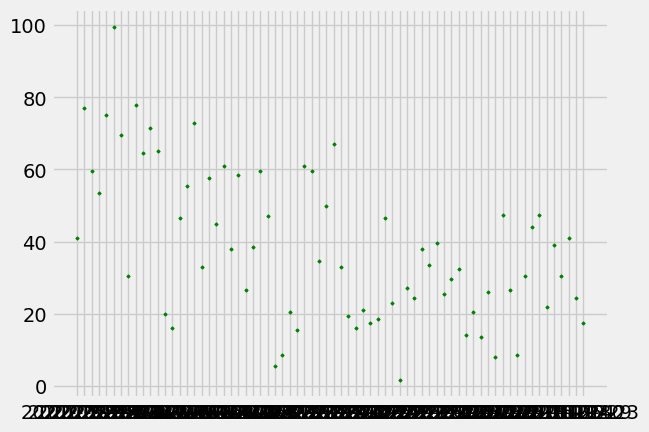

In [16]:
plt.scatter(filtered_plot_df['game_date'],filtered_plot_df['fp'],2,'g', linewidth = 1, marker = 'D', )
plt.show()

In [17]:
datelist = pd.date_range(start=season_start_date, end=season_end_date).tolist()



In [18]:
# create all days for last season
plot_df = pd.DataFrame()
plot_df['game_date'] = datelist
plot_df['game_date'] = pd.to_datetime(plot_df['game_date']).dt.strftime('%Y-%m-%d')
plot_df.set_index('game_date',inplace = True)

# fill in nan for all days
plot_df['fp'] = 0
plot_df

,fp
game_date,
2020-12-22,0
2020-12-23,0
2020-12-24,0
2020-12-25,0
2020-12-26,0
...,...
2021-05-12,0
2021-05-13,0
2021-05-14,0


In [19]:
# update with actual matches
plot_df.update(filter)
# sort by date order
plot_df.sort_values(by=['game_date'], inplace = True, ascending = False)

with pd.option_context("display.max_rows", 1000):
    display(plot_df)
len(plot_df)

,fp
game_date,
2021-05-16,41.0
2021-05-15,0.0
2021-05-14,77.0
2021-05-13,0.0
2021-05-12,59.5
2021-05-11,0.0
2021-05-10,53.5
2021-05-09,0.0
2021-05-08,0.0


146

In [20]:
# reset index for plotting
plot_df = plot_df.reset_index()
plot_df

,game_date,fp
0,2021-05-16,41.0
1,2021-05-15,0.0
2,2021-05-14,77.0
3,2021-05-13,0.0
4,2021-05-12,59.5
...,...,...
141,2020-12-26,0.0
142,2020-12-25,0.0
143,2020-12-24,0.0
144,2020-12-23,17.5


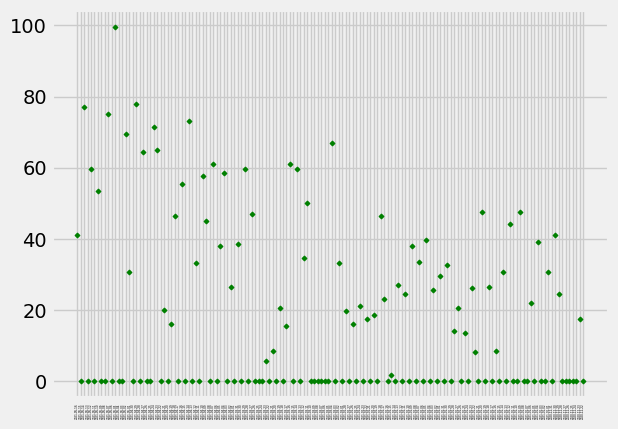

In [21]:
plt.scatter(plot_df['game_date'],plot_df['fp'],5,'g', linewidth = 1, marker = 'D')
plt.xticks(rotation=90, fontsize=2)
plt.show()